In [18]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from networkx.algorithms.isomorphism import GraphMatcher
from itertools import combinations

In [19]:
E1 = [("A", "B"), ("B", "C"), ("C", "A"), ("B", "D"), ("D", "C"), ("D", "E")]
E2 = [("A", "B"), ("B", "C"), ("C", "D"), ("D", "E")]
# E3 = [("A", "E"), ("A", "B"), ("A", "C"), ("A", "D")]

In [20]:
G1 = nx.from_edgelist(E1)
G2 = nx.from_edgelist(E2)
#G3 = nx.from_edgelist(E3)

In [21]:
GRAPH_DB = [G1, G2]

In [5]:
G2.number_of_nodes()

5

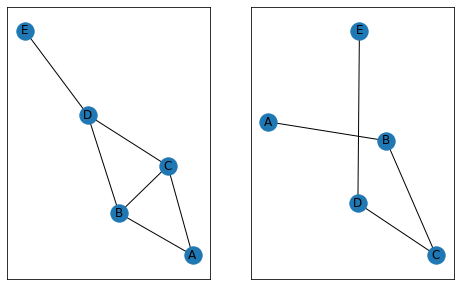

In [22]:
plt.figure(figsize=(8,5))
plt.figure(1)

plt.subplot(1,2,1)
nx.draw_networkx(G1)

plt.subplot(1,2,2)
nx.draw_networkx(G2)

plt.show()

{('A', 'B'): 2, ('B', 'C'): 2, ('C', 'A'): 1, ('B', 'D'): 1, ('D', 'C'): 1, ('D', 'E'): 2, ('C', 'D'): 1}
[('A', 'B'), ('B', 'C'), ('D', 'E')]


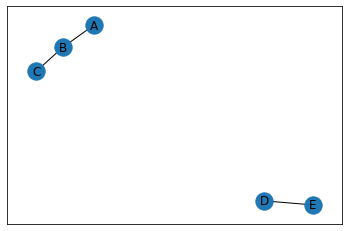

In [24]:
items_counted = dict()
min_sup = 2
edge_matrix = [E1, E2]

for edge_list in edge_matrix:
    for edge in edge_list:
        items_counted[edge] = items_counted.get(edge, 0) + 1

print(items_counted)

frequent_items = [key for key, value in items_counted.items() if value >= min_sup]

print(frequent_items)

C = nx.from_edgelist(frequent_items)
nx.draw_networkx(C)

# for edge1 in E1:
#     for edge2 in E2:
#         if edge1 == edge2:
#             frequent_items.append(edge1)

In [25]:
pos = (C.subgraph(c).copy() for c in nx.connected_components(C))

In [26]:
candidate_subgraphs = dict()
for i, sg in enumerate(pos):
    name = "G" + str(i)
    candidate_subgraphs[name] = sg

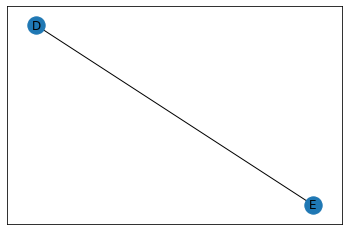

In [28]:
nx.draw_networkx(candidate_subgraphs["G1"])

In [29]:
frequent_items2 = dict()
for graph in GRAPH_DB:
    for key, subgraph in candidate_subgraphs.items():

        GM = GraphMatcher(graph, subgraph)
        is_isomorphic = GM.subgraph_is_monomorphic()

        if GM:
            edges = tuple(subgraph.edges())
            frequent_items2[edges] = frequent_items2.get(edges, 0) + 1
            


In [30]:
frequent_items2

{(('A', 'B'), ('B', 'C')): 2, (('E', 'D'),): 2}

In [247]:
frequent_items

[('A', 'B'), ('B', 'C'), ('D', 'E')]

In [17]:
test = [("A", "B")]
G3 = nx.from_edgelist(test)

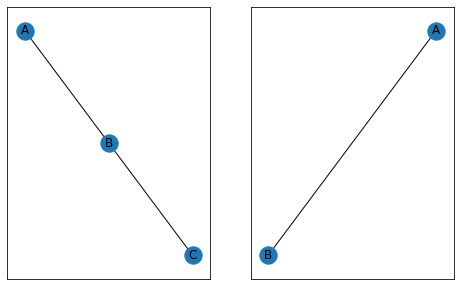

In [46]:
plt.figure(figsize=(8,5))
plt.figure(1)

plt.subplot(1,2,1)
nx.draw_networkx(C)

plt.subplot(1,2,2)
nx.draw_networkx(G3)

plt.show()

In [202]:
GM = GraphMatcher(G1, G2)

In [203]:
GM.subgraph_is_monomorphic()

True

In [204]:
GM.subgraph_is_isomorphic()

False

In [131]:
sub = G1.subgraph(["A", "B", "C"])

In [135]:
path = nx.path_graph(["A", "B", "C"])

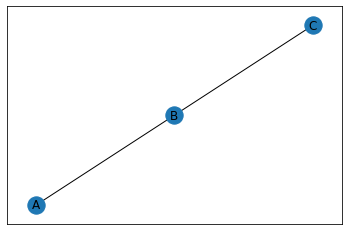

In [136]:
nx.draw_networkx(path)

In [79]:
for edge in frequent_items:
    print(G1.has_edge(*edge))

True
True
False


In [83]:
def accepts(g, path):
    return all([(path[i],path[i+1]) in g.edges() for i in range(len(path)-1)])

In [98]:
accepts(G2, new_path2)

False

In [7]:
counts = dict()
items = ['apple', 'red', 'apple', 'red', 'red', 'pear']
for item in items:
    counts[item] = counts.get(item, 0) + 1

In [8]:
counts

{'apple': 2, 'red': 3, 'pear': 1}

In [166]:
for nodes in combinations(G1.nodes, G2.number_of_nodes()):
    subgraph = nx.subgraph(nodes)
    print(subgraph.edges)
    
    GM = GraphMatcher(subgraph, G2)

    iso = GM.is_isomorphic()
    
    if iso:
        print("Yes")
    else:
        print("No")


[('A', 'B'), ('B', 'C'), ('C', 'D')]
No
[('A', 'B'), ('B', 'C'), ('C', 'E')]
No
[('A', 'B'), ('B', 'D'), ('D', 'E')]
No
[('A', 'C'), ('C', 'D'), ('D', 'E')]
No
[('B', 'C'), ('C', 'D'), ('D', 'E')]
No


In [145]:
E3 = [('B', 'C'), ('C', 'D')]
E4 = [('A', 'B'), ('B', 'C')]
G3 = nx.from_edgelist(E3)
G4 = nx.from_edgelist(E4)

GM = GraphMatcher(G3, G4)
GM.is_isomorphic()

True

In [142]:
subgraph.nodes

NodeView(('B', 'C', 'D'))

In [143]:
subgraph.edges

EdgeView([('B', 'C'), ('C', 'D')])